Source https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

In [1]:
from xlrd import open_workbook
import os.path

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from pandas import DataFrame
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Set a seed value
seed_value= 123999

In [3]:
y_Source = pd.ExcelFile("D:/VMS/Final_Result_I.xlsx",engine='openpyxl')

In [4]:
Y = pd.read_excel(y_Source,"Y_h").astype("category")
Y.head(3)

,Interview Number,Eye_Contact,sad,angry,surprise,fear,happy,neutral,disgust,captured,Smile,Eye
0,P06681_06_06_2019_081946,0.400552,0.574586,0.209945,0.002762,0.019337,0.044199,0.149171,0.0,0.603333,1,1
1,P06682_17_06_2019_024317,0.279188,0.449239,0.507614,0.005076,0.017766,0.010152,0.010152,0.0,0.656667,1,1
2,P06682_21_06_2019_064900,0.197002,0.533191,0.032120,0.000000,0.029979,0.040685,0.364026,0.0,0.778333,1,1


In [5]:
Y=Y.drop(['Interview Number'], axis=1)

In [6]:
# Y['Eye_Conact']=Y['Eye_Conact'].astype('float64')
Y['sad']=Y['sad'].astype('float64')
Y['angry']=Y['angry'].astype('float64')
Y['surprise']=Y['surprise'].astype('float64')
Y['fear']=Y['fear'].astype('float64')
Y['happy']=Y['happy'].astype('float64')
Y['neutral']=Y['neutral'].astype('float64')
Y['disgust']=Y['disgust'].astype('float64')
Y['captured']=Y['captured'].astype('float64')

In [7]:
Y.dtypes

Eye_Contact    category
sad             float64
angry           float64
surprise        float64
fear            float64
happy           float64
neutral         float64
disgust         float64
captured        float64
Smile          category
Eye            category
dtype: object

In [8]:
X_Cor=Y.drop(['Smile','Eye'], axis=1)

In [9]:
X = Y.drop(['Smile','Eye','angry'], axis=1)

In [10]:
Y_Eye=Y[['Eye']]

In [11]:
Y_Smile=Y[['Smile']]

In [12]:
X_ONEONLKY=Y[['Eye_Contact']]

In [13]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler() #preprocessing.StandardScaler() preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [14]:
X_ONEONLKY= mm_scaler.fit_transform(X_ONEONLKY)

In [15]:
# Y_Eye = pd.get_dummies(Y_Eye)

<AxesSubplot:title={'center':'Correlation matrix'}>

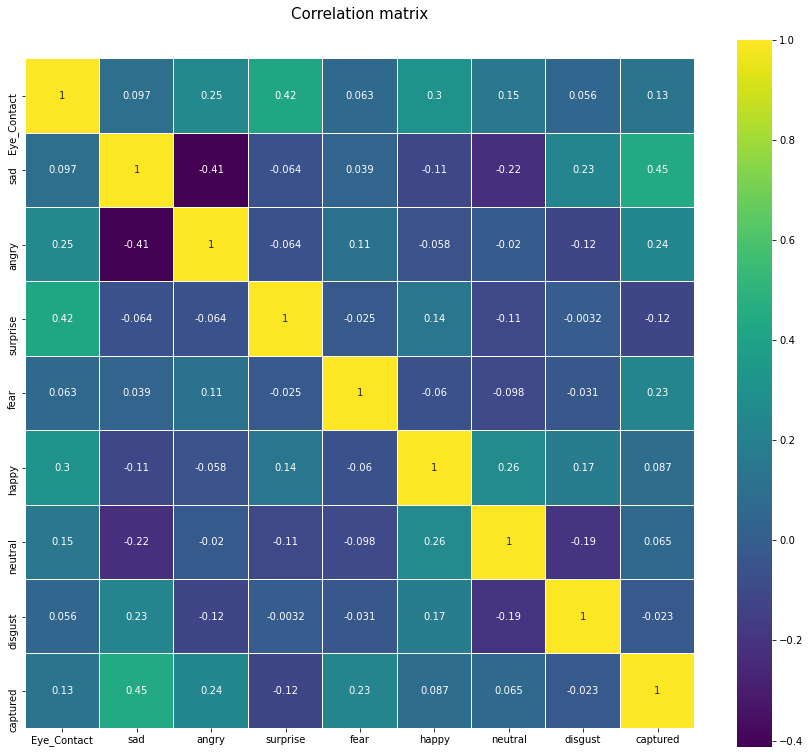

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,13))
plt.title('Correlation matrix', y=1.05, size=15)
sns.heatmap(X_Cor.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
X_Cor.columns

Index(['Eye_Contact', 'sad', 'angry', 'surprise', 'fear', 'happy', 'neutral',
       'disgust', 'captured'],
      dtype='object')

In [18]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [19]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['LR'] = LogisticRegression()
	models['KNN'] = KNeighborsClassifier()
	models['DT'] = DecisionTreeClassifier()
	models['SVM'] = SVC()
	models['Bayes'] = GaussianNB()
	return models

In [20]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# 1-Eye Contact 

>LR 0.594 (0.127)
>KNN 0.522 (0.186)
>DT 0.572 (0.200)
>SVM 0.561 (0.091)
>Bayes 0.539 (0.191)


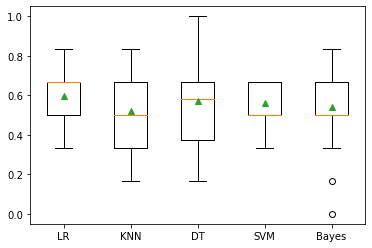

In [21]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y_Eye)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [22]:
lables=Y_Eye.to_numpy(dtype='float32')
lables=lables.reshape(-1,)
m1=LogisticRegression()

result =m1.fit(X, lables)

In [23]:
m1.coef_

array([[ 1.02064775e+00, -4.74143800e-01, -3.56849460e-01,
         5.33638170e-04, -1.51798969e-01, -2.05590245e-01,
        -3.41050314e-01, -6.21332944e-01]])

In [24]:
m1.intercept_

array([0.82769582])

In [25]:
m1.classes_

array([0., 1.], dtype=float32)

In [26]:
y_pred = m1.predict(X)

In [27]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [28]:
lables

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0.], dtype=float32)

In [29]:
y_pred_all= m1.predict_proba(X)
y_pred_all = y_pred_all[:, 1]
y_pred_all

array([0.6433987 , 0.62880545, 0.54305976, 0.5715783 , 0.57158672,
       0.62783011, 0.58466355, 0.6958675 , 0.60494477, 0.6958675 ,
       0.56358764, 0.65184076, 0.6958675 , 0.66030339, 0.74677241,
       0.6958675 , 0.6958675 , 0.51930854, 0.5501093 , 0.4659742 ,
       0.63035841, 0.48723791, 0.76435954, 0.6958675 , 0.63190822,
       0.4633481 , 0.50935256, 0.51348137, 0.60153256, 0.56592622,
       0.51601627, 0.52496564, 0.59844802, 0.56296788, 0.55312197,
       0.66700982, 0.63541673, 0.67552327, 0.69597632, 0.61972464,
       0.53527867, 0.55051218, 0.52910073, 0.62424929, 0.63546071,
       0.58342273, 0.52587629, 0.60106303, 0.55530452, 0.54749719,
       0.47235425, 0.50729413, 0.54992458, 0.68420868, 0.55073989,
       0.67902582, 0.66473839, 0.66543921, 0.7217848 , 0.49127115])

In [30]:
ns_probs = [0 for _ in range(len(lables))]

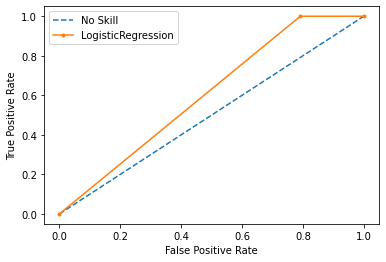

<Figure size 576x432 with 0 Axes>

In [31]:
ns_fpr, ns_tpr, _ = roc_curve(lables, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(lables, y_pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
plt.figure(figsize = (8,6))
pyplot.show()

In [33]:
lr_auc = roc_auc_score(lables, y_pred)
lr_auc

0.6041666666666667

In [34]:
auc = roc_auc_score(lables, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.604


# 2-Smile

>LR 0.800 (0.145)
>KNN 0.767 (0.181)
>DT 0.833 (0.161)
>SVM 0.778 (0.151)
>Bayes 0.778 (0.117)


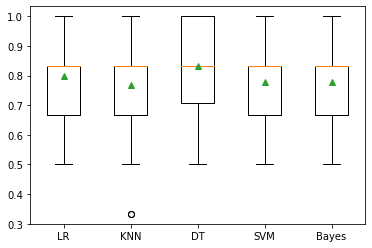

In [35]:
# get the models to evaluate
models2 = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model2 in models2.items():
	scores = evaluate_model(model2, X, Y_Smile)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [36]:
lables=Y_Smile.to_numpy(dtype='float32')
lables=lables.reshape(-1,)
models2=LogisticRegression()

result =models2.fit(X, lables)

In [37]:
models2.coef_

array([[ 0.82560894, -0.77538213,  0.55395423,  0.25521766,  1.42369718,
         1.16744599,  0.6068759 ,  1.67703674]])

In [38]:
models2.intercept_

array([-0.91338127])

In [39]:
y_pred1= models2.predict(X)
y_pred1

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [40]:
y_pred2= models2.predict_proba(X)
y_pred2 = y_pred2[:, 1]

In [41]:
y_pred2

array([0.64804384, 0.56236019, 0.76022553, 0.69517968, 0.41996856,
       0.33951502, 0.35146222, 0.28630842, 0.49598029, 0.28630842,
       0.59324537, 0.47457285, 0.28630842, 0.60508312, 0.54868667,
       0.28630842, 0.28630842, 0.59369579, 0.65731426, 0.56425175,
       0.39600277, 0.7509667 , 0.70325764, 0.28630842, 0.71127896,
       0.55030106, 0.56945797, 0.50298454, 0.38558219, 0.6422826 ,
       0.64568223, 0.53839706, 0.45485421, 0.77052916, 0.78406428,
       0.44658141, 0.94766024, 0.63605177, 0.5722261 , 0.83447023,
       0.48875166, 0.47928387, 0.54297697, 0.41881811, 0.37910043,
       0.54426322, 0.5503215 , 0.59887163, 0.71239464, 0.60659717,
       0.45579408, 0.43287356, 0.65360713, 0.6940285 , 0.75344616,
       0.74035776, 0.71917026, 0.82858641, 0.74720092, 0.7833967 ])

In [42]:
ns_probs = [0 for _ in range(len(lables))]

In [43]:
ns_auc = roc_auc_score(lables, ns_probs)
ns_auc

0.5

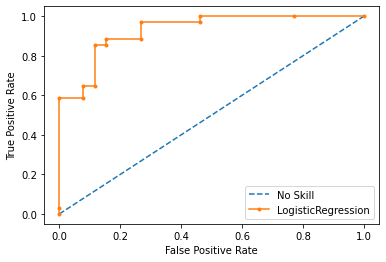

<Figure size 576x432 with 0 Axes>

In [44]:
ns_fpr, ns_tpr, _ = roc_curve(lables, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(lables, y_pred2)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legenda
pyplot.legend()
# show the plot
plt.figure(figsize = (8,6))
pyplot.show()

In [45]:
lr_auc = roc_auc_score(lables, y_pred1)
lr_auc

0.8359728506787331

In [46]:
auc = roc_auc_score(lables, y_pred1)
print('AUC: %.3f' % auc)

AUC: 0.836


In [47]:
y_pred1

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

In [54]:
clf = DecisionTreeClassifier(random_state=42).fit(X, lables)

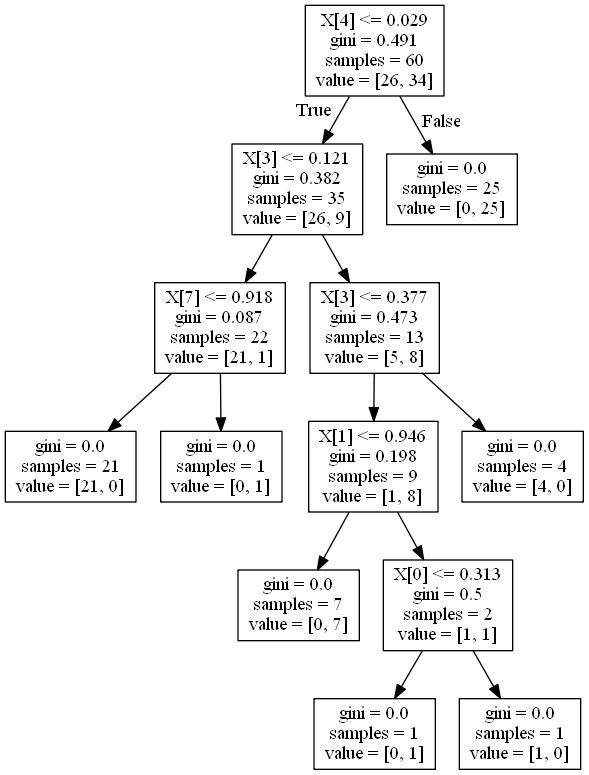

In [55]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [58]:
y_pred3= clf.predict_proba(X)
y_pred3 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [59]:
lables

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)